# **Homework 3**

---


# ***Which Fruit Is It?***

NOTE: The deadline is in 10 days!

The starter notebook for this homework is hw3_starter.ipynb. You must use the output already provided in the notebook, because we will be grading automatically.

In this homework your goal is to identify fruit based on the following attributes: mass, width, height and color. The data set is slightly permutated  and is available here: https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv

Specifically, your goal is to:

1. Build a logistic regression classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:
- the best one you can get (based on area under the ROC), and
- is not overfitted (use cross validation).
- ***What to report: a) the model coefficients, b) confusion matrix, and c) the area under ROC of your best model.***

2. Here, build a decision tree classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score (You are welcome to use regularization, but it is not required). Make sure the model is:
- the best one you can get (based on accuracy on test data),
- is not overfitted (use cross validation).
- ***What to report: a) plot of the decision tree and b) the accuracy of your best model on the test data.***

3. Draw the decision boundaries for the two models above and consider their performance vis-a-vis the decision boundaries. Answer the following question in a text cell. What to report:

- ***What do you notice in terms of the relationship between model performance and decision boundary for each model?***


##  ***Load the Data Set***

In [ ]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,multilabel_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import numpy as np
from matplotlib.colors import ListedColormap
# load the data
pd.set_option('display.max_rows', None)
df = pd.read_csv('https://raw.githubusercontent.com/lkyin/ECS189L/main/fruits.csv', index_col=[0])

In [ ]:
# overview 
df

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,198.04,8.47,7.29,0.54
1,1,apple,granny_smith,169.98,7.84,6.41,0.59
2,1,apple,granny_smith,183.37,7.58,7.62,0.60
3,2,mandarin,mandarin,88.73,6.31,4.55,0.82
4,2,mandarin,mandarin,80.54,6.30,4.83,0.83
5,2,mandarin,mandarin,80.63,5.77,4.23,0.80
6,2,mandarin,mandarin,82.66,5.92,4.11,0.77
7,2,mandarin,mandarin,73.22,5.70,3.96,0.86
8,1,apple,braeburn,178.29,7.17,7.50,0.95
9,1,apple,braeburn,166.64,7.67,6.88,0.84


## ***Q1. Build a logistic regression classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:***
- the best one you can get (based on area under the ROC), and
- is not overfitted (use cross validation).
- ***What to report: a) the model coefficients, b) confusion matrix, and c) the area under ROC of your best model.***

### Select the dependent variable, and your independent variables of interest.

In [ ]:
# YOUR CODE
df_filtered = df.drop(df[(df['fruit_name'] == "orange") & (df['mass'] >= 178)].index)
df_filtered = df_filtered.drop(df_filtered[(df_filtered['fruit_name'] == "apple") & (df_filtered['mass'] >= 190)].index)
df_filtered = df_filtered.drop(df_filtered[(df_filtered['fruit_name'] == "apple") & (df_filtered['width'] >= 8.4)].index)
print(df.shape[0])
print(df_filtered.shape[0])
print(df[df['fruit_name']=="orange"].shape)
print(df_filtered[df_filtered['fruit_name']=="orange"].shape)
X1 = df[['mass', 'width', 'height', 'color_score']]
X1 = stats.zscore(X1)
y1 = df['fruit_label']
y2 = df['fruit_label']
y1 = label_binarize(y1, classes=[1, 2, 3, 4])

590
517
(190, 7)
(126, 7)


### Split Training and Testing Using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2,random_state=5)
_, _, y_train2, _ = train_test_split(X1, y2, test_size = 0.2,random_state=5)
# YOUR CODE


### Build your model(s) with traning X and Training Y

In [ ]:
# YOUR CODE
clf = OneVsRestClassifier(LogisticRegressionCV(Cs =[1e-1,5e-1,1,10,50,100,500,1000] ,random_state=0,cv=5,scoring="roc_auc"))
y_score1 = clf.fit(X_train1, y_train1).decision_function(X_test1)

### Show the summary of your best model(s)

In [ ]:
# YOUR CODE
model_coeff = clf.coef_
print("coefficients format: ", ['mass', 'width', 'height', 'color_score'])
print("model coefficients for apple model: ", model_coeff[0])
print("model coefficients for mandarin model: ", model_coeff[1])
print("model coefficients for orange model: ", model_coeff[2])
print("model coefficients for lemon model: ", model_coeff[3])
y_pred = clf.predict(X_test1)
classes = ["apple", "mandarin","orange","lemon"]
multi_matrix = multilabel_confusion_matrix(y_test1, y_pred)
mat_lab = [["TN", "FP"],["FN", "TP"]]
print("Format of confusion matrix", mat_lab)
print("Confusion Matrix for apple: ",multi_matrix[0])
print("Confusion Matrix for mandarin: ",multi_matrix[1])
print("Confusion Matrix for orange: ",multi_matrix[2])
print("Confusion Matrix for lemon: ",multi_matrix[3])

coefficients format:  ['mass', 'width', 'height', 'color_score']
model coefficients for apple model:  [-1.94093426  2.85059269 -0.3868772   0.61208738]
model coefficients for mandarin model:  [-0.81824932 -0.61268712 -1.56902514  0.16725607]
model coefficients for orange model:  [ 1.30246369  0.0670568  -0.44626306  0.13239845]
model coefficients for lemon model:  [-1.45976738 -3.04592068  4.2731288  -1.15255084]
Format of confusion matrix [['TN', 'FP'], ['FN', 'TP']]
Confusion Matrix for apple:  [[70 16]
 [11 21]]
Confusion Matrix for mandarin:  [[103   0]
 [  0  15]]
Confusion Matrix for orange:  [[82  2]
 [26  8]]
Confusion Matrix for lemon:  [[81  0]
 [ 1 36]]


### Plot the ROC curve(s) and show the AUC value(s).

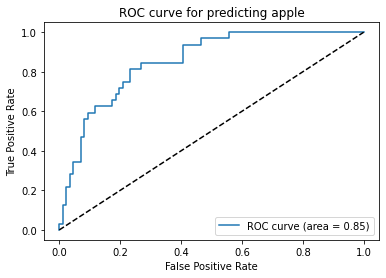

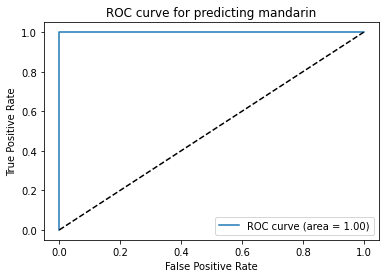

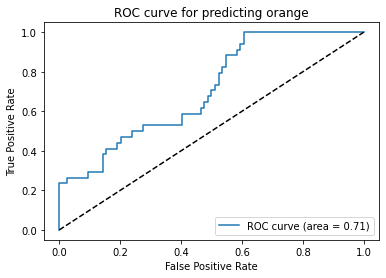

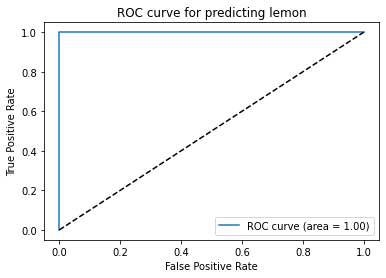

Final AUC of the model:  0.8899318448309557


In [ ]:
# YOUR CODE
fpr = {}
tpr = {}
roc_auc = {}
classes = ["apple", "mandarin","orange","lemon"]
l = []
# interate through each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i, classname in enumerate(classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    l.append(roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for predicting {}'.format(classname))
    plt.legend(loc="lower right")
    plt.show()
print("Final AUC of the model: ",sum(l)/4)

## ***Q2. Build a decision tree classifier to predict the fruit_name variable in terms of the predictors mass, width, height, and color_score. Make sure the model is:***
- the best one you can get (based on accuracy on test data),
- is not overfitted (use cross validation).
- ***What to report: a) plot of the decision tree and b) the accuracy of your best model on the test data.***



In [ ]:
# YOUR CODE HERE 
params = {"max_depth" : range(1,500)}

In [ ]:
# YOUR CODE HERE 
clf2 = GridSearchCV(DecisionTreeClassifier(), params,n_jobs=-1,scoring="accuracy")
clf2.fit(X_train1, y_train1)
clf2 = clf2.best_estimator_

Accuracy of the best model on test data:  0.8728813559322034


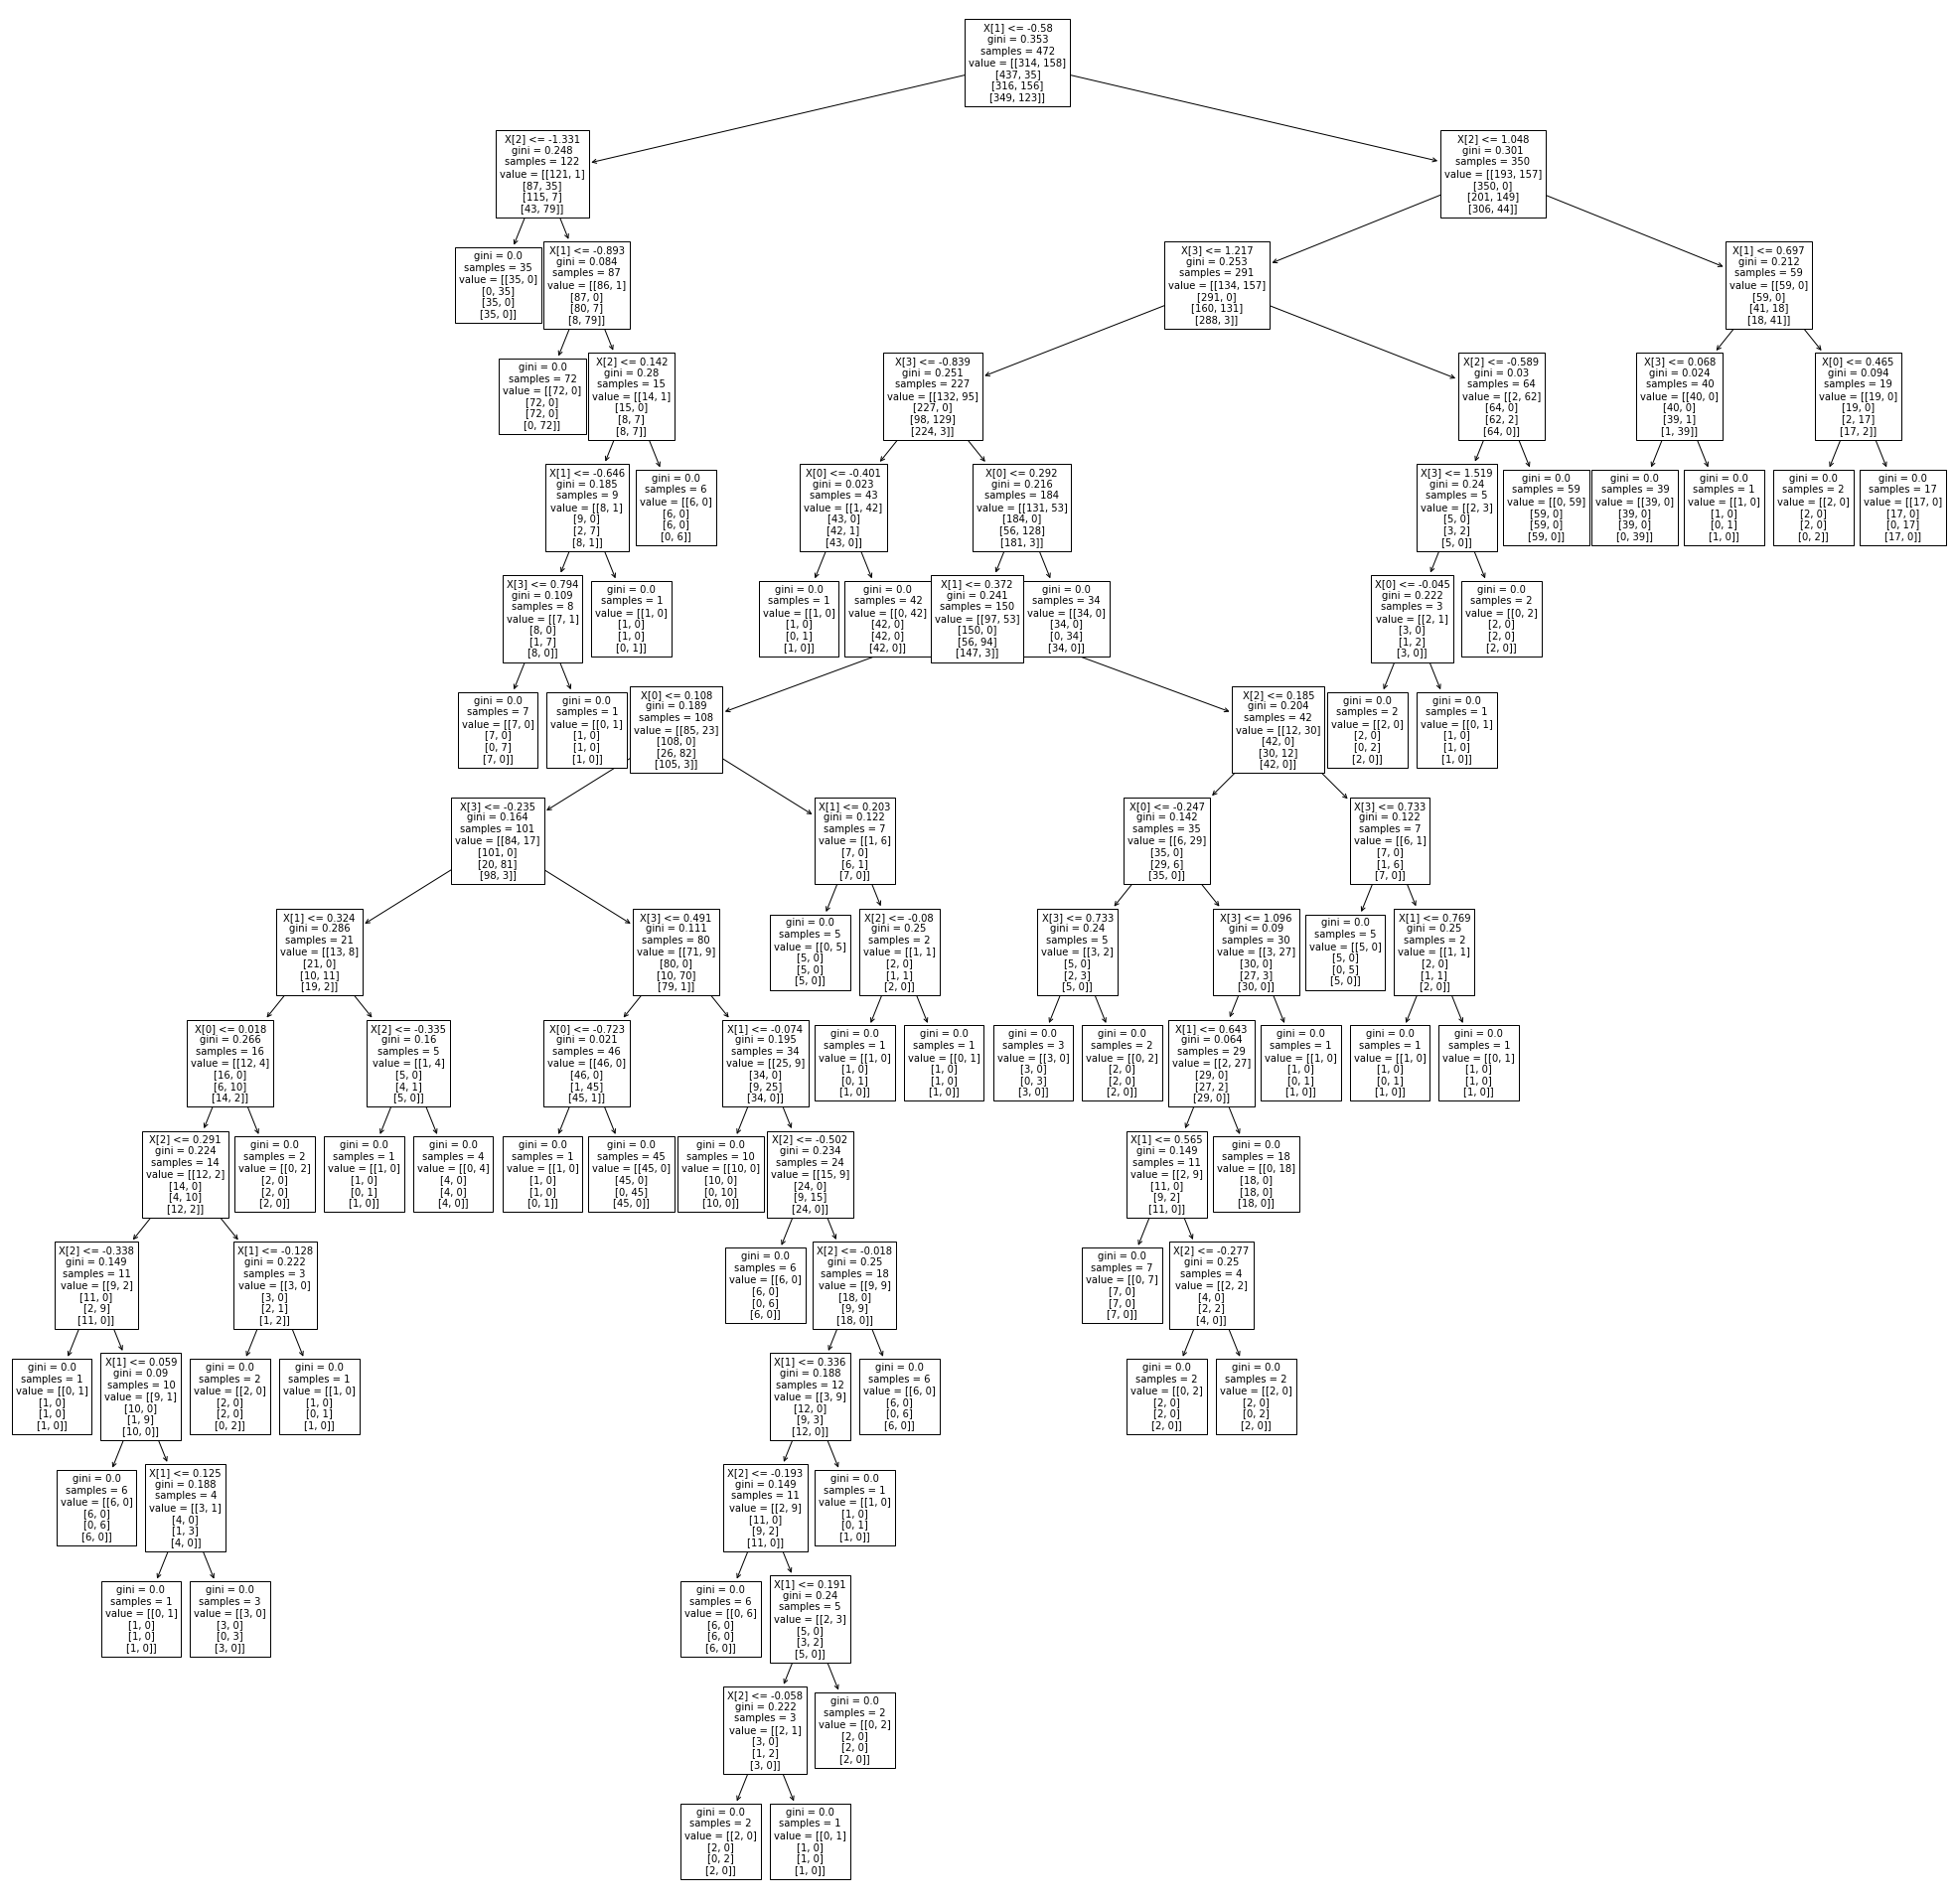

In [ ]:
# YOUR CODE HERE 
fig = plt.figure(figsize=(35,35))
tree.plot_tree(clf2,fontsize=10);
print("Accuracy of the best model on test data: ",clf2.score(X_test1, y_test1))

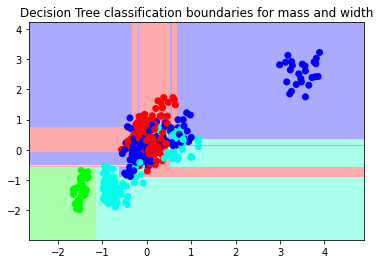

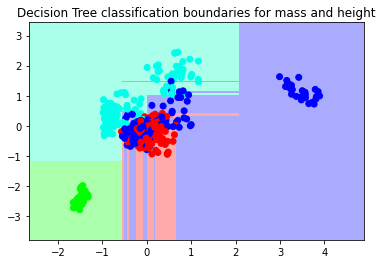

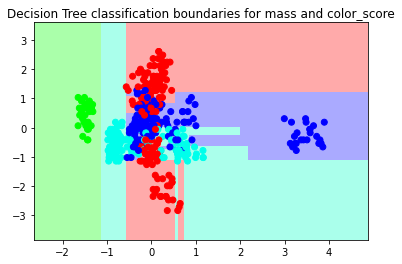

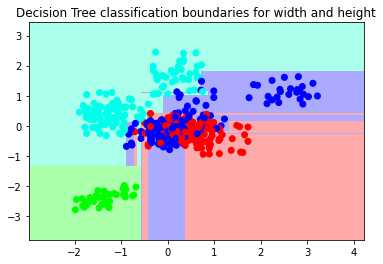

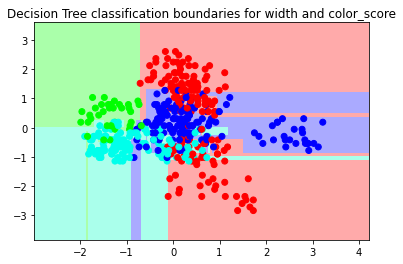

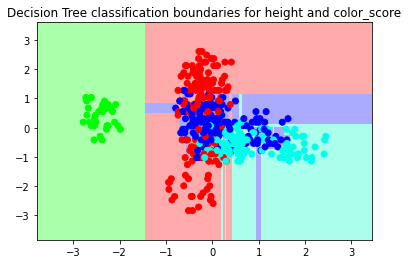

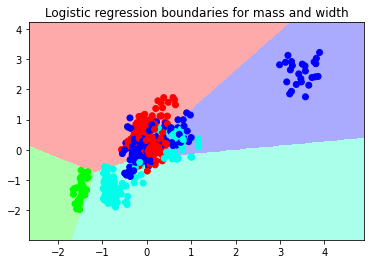

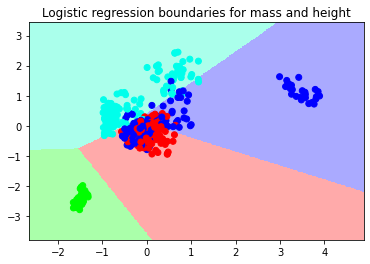

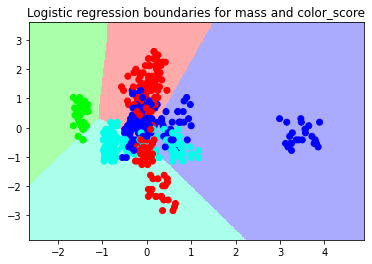

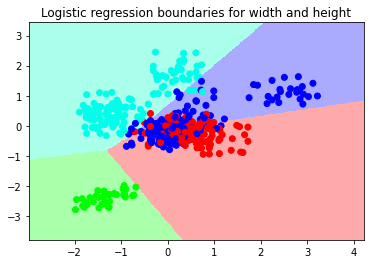

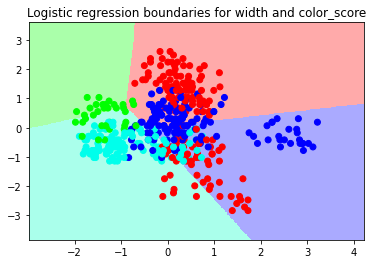

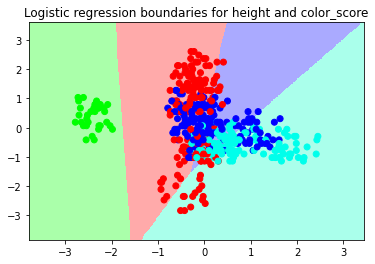

In [ ]:
# YOUR CODE HERE 
# Parameters
n_classes = 4
plot_colors = "bry"
h = 0.02

# Load data


for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    
    feature_dict = {0:'mass', 1:'width', 2:'height', 3:'color_score'}
    X = X_train1[:, pair]
    y = y_train2

    # Train
    clf3 = DecisionTreeClassifier(max_depth=clf2.max_depth).fit(X, y)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAFFEB'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#00FFEB'])

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # plotting
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Tree classification boundaries for {} and {}".format(feature_dict[pair[0]],feature_dict[pair[1]]))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    
    feature_dict = {0:'mass', 1:'width', 2:'height', 3:'color_score'}
    X = X_train1[:, pair]
    y = y_train2

    # Train
    clf3 = LogisticRegression(C=0.1).fit(X, y)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAFFEB'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#00FFEB'])

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    # plotting
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Logistic regression boundaries for {} and {}".format(feature_dict[pair[0]],feature_dict[pair[1]]))


### ***Q3. Draw the decision boundaries for the two models above and consider their performance vis-a-vis the decision boundaries. Answer the following question in a text cell. What to report:***

- ***What do you notice in terms of the relationship between model performance and decision boundary for each model?***

***Report Here***

The decision boundaries in the plots conveys the information that if a new data point pops up, how that will be classified. The scatter plot in the plots represent the training data. It can be seen that a decision tree classifier can have discontinuous decision boundaries making it a better classifier. However, The decision boundaries in a logistic regression models are always continuous and thus leads to a reduction in performance. It can also be seen through the decision boundaries how the decision tree classifier is a rule based classifier. It can be observed from the decision boundaries that is a lot of coinciding between the training data and the boundaries for decision tree than for logistic regression model which conveys that decision tree classifier is not overfitting much. 






---
###***Good Job! You are done here!***